In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
NUM_PLAYERS = 10000

## supply constants
T0_SUPPLY = 300
MAX_SUPPLY = 600
MIN_SUPPLY = 60
DELTA_SUPPLY = 20

## price constants
T0_PRICE = 25
MIN_PRICE = 5
DELTA_PRICE = 2
# MAX_PRICE = infinite

## purchase constants
# MAX_PURCHASES = last day's supply * 3/4
# MIN_PURCHASES = last day's supply * 1/4

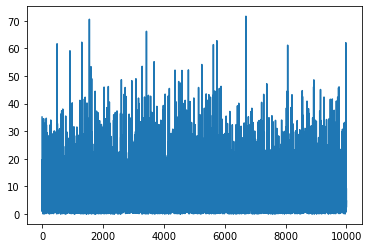

In [ ]:
thresholds = np.load("thresholds.npy")
plt.plot(thresholds)
plt.show
plt.savefig("thresholds.pdf")

In [ ]:
print("Thresholds lie between " + str(min(thresholds)) + " to " + str(max(thresholds)))

Thresholds lie between 5.809122300651691e-05 to 71.67573233038755


In [ ]:
def calculate_motivations(thresholds, price_on_that_day):
  return thresholds - price_on_that_day

def pick_most_motivated_players(motivations, supply):
  if(len(motivations[motivations > 0]) >= supply):
    return (-motivations).argsort()[:supply]
  else:
    if(len(motivations[motivations > 0]) == 0):
      return []
    indices = [i for i in range(len(motivations))]
    indices = np.array(indices)
    return indices[motivations > 0]

def fcfs(motivations, supply):
  applicable_players = len(motivations[motivations > 0])

  if(applicable_players >= supply):
    indices = (-motivations).argsort()[:applicable_players]
    random.shuffle(indices)
    return indices[:supply]
  else:
    if(applicable_players == 0):
      return []
    indices = [i for i in range(len(motivations))]
    indices = np.array(indices)
    return indices[motivations > 0]

Total revenue = 64357.0
Revenue plot:


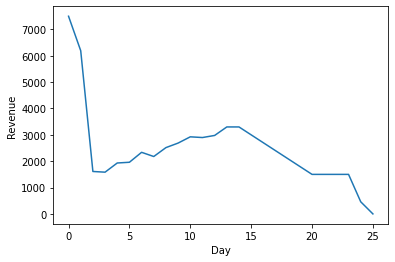

Prices plot:


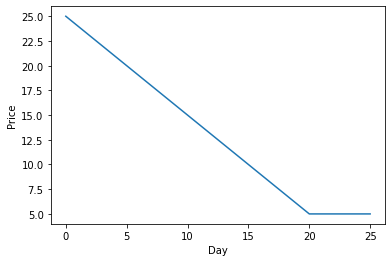

Supplies plot:


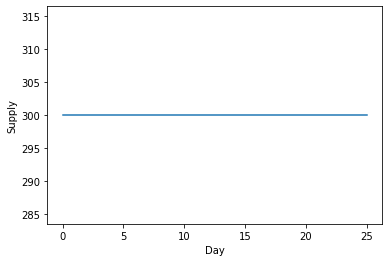

In [ ]:
### Keeping the supply constant 

current_price = T0_PRICE
constant_supply = T0_SUPPLY
constant_decrement = DELTA_PRICE/2
thresholds_copy = np.copy(thresholds)

revenues = []
prices = []
supplies = []

while(1):
  prices.append(current_price)
  supplies.append(T0_SUPPLY)
  motivations = calculate_motivations(thresholds_copy, current_price)
  who_bought = fcfs(motivations, constant_supply)
  
  today_purchases = len(who_bought)
  revenues.append(len(who_bought) * current_price)

  if today_purchases == 0 and current_price == MIN_PRICE:
    break
  
  thresholds_copy = np.delete(thresholds_copy, who_bought)
  
  current_price = max(current_price - constant_decrement, MIN_PRICE)

revenues = np.array(revenues)
print ("Total revenue = " + str(np.sum(revenues)))
print("Revenue plot:")
plt.plot(revenues)
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.show()

prices = np.array(prices)
print("Prices plot:")
plt.plot(prices)
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

supplies = np.array(supplies)
print("Supplies plot:")
plt.plot(supplies)
plt.xlabel("Day")
plt.ylabel("Supply")
plt.show()

Variable Supply  


Total revenue = 63844
Revenue plot:


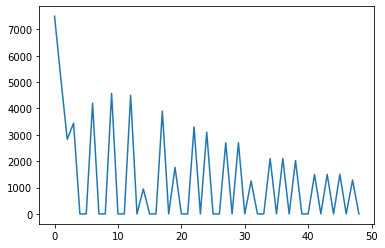

Prices plot:


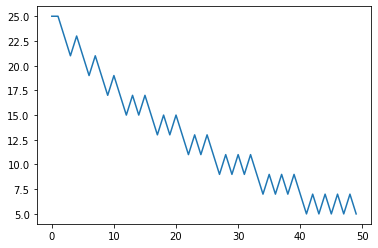

Supplies plot:


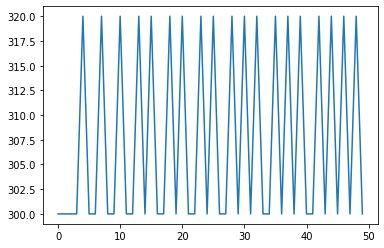

In [ ]:
### Keeping the supply constant 
thresholds_copy = np.copy(thresholds)

revenues = []
prices = []
supplies = []
sold = []

current_price = T0_PRICE
current_supply = T0_SUPPLY

while(1):
  
  prices.append(current_price)
  supplies.append(current_supply)
  motivations = calculate_motivations(thresholds_copy, current_price)
  who_bought = fcfs(motivations, current_supply)

  if len(who_bought) == 0 and current_price == MIN_PRICE:
    break

  sold.append(len(who_bought))
  thresholds_copy = np.delete(thresholds_copy, who_bought)
  
  revenues.append(len(who_bought) * current_price)
  
  if len(sold) >= 2:
    diff_bought = sold[-1] - sold[-2]
    diff_price = prices[-1] - prices[-2]
    # if diff_bought > 0:
    #     current_supply = min(current_supply + DELTA_SUPPLY, MAX_SUPPLY)
    #     current_price = current_price + DELTA_PRICE
    # elif diff_bought < 0:
    #     current_supply = max(current_supply - DELTA_SUPPLY, MIN_SUPPLY)
    #     current_price = max(current_price - DELTA_PRICE, MIN_PRICE)
    if(diff_bought > 0):
      if(diff_price <= 0):
        current_supply = current_supply + DELTA_SUPPLY
        current_price = current_price + DELTA_PRICE
    else:
      if(diff_price > 0):
        current_supply = current_supply - DELTA_SUPPLY
        current_price = current_price - DELTA_PRICE
      else:
        current_price = current_price - DELTA_PRICE


revenues = np.array(revenues)
print ("Total revenue = " + str(np.sum(revenues)))
print("Revenue plot:")
plt.plot(revenues)
plt.show()

prices = np.array(prices)
print("Prices plot:")
plt.plot(prices)
plt.show()

supplies = np.array(supplies)
print("Supplies plot:")
plt.plot(supplies)
plt.show()